# Samples Notebook

This notebook is a refernce for a variety of example code, Markdown, and $\LaTeX$. Code is always displayed by the Notebook. Markdown and $\LaTeX$ can be edited by double-clicking, and compiled by using the same Run button from the Toolbar that is used to run code.

Populating the interactive namespace from numpy and matplotlib


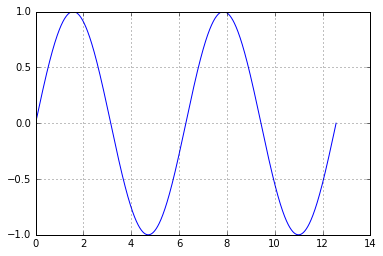

In [1]:
# Dumping into global namespace
%pylab inline
x = linspace(0,4 * pi,1000)
plot(x, sin(x), 'b')
grid(True)

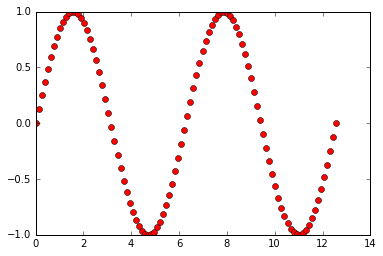

In [89]:
#Specifiying namespace
#Probably preferred, to develop habit of working with namespaces,
#and building awareness of where things come from
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4 * pi,100)
plt.plot(x, np.sin(x), 'ro')

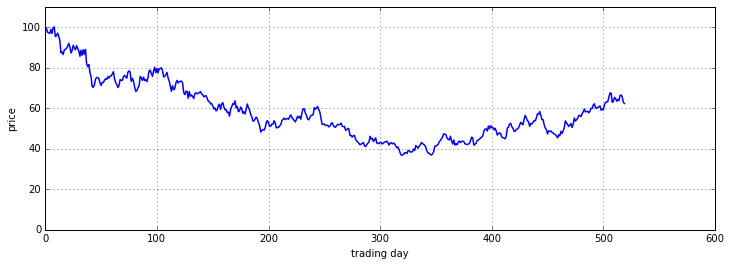

In [90]:
#Simulate stock prices, using RiskMetrics assumptions: prices are lognormal, zero mean
#Hmmmm. I don't like this example. Let's avoid using RM for long horizon stuff. 
#See next example, which follows PfF p 274-275

#Prefer to change this to a distribution example, where we simulate many times over one day
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

trading_days_per_annum = 260

num_trading_days = 2 * trading_days_per_annum

drift_annual = 0.03 #as exponential rate
vol_annual = 0.4
price_0 = 100

days = range(0, num_trading_days)
daily_returns = [(r * vol_annual/np.sqrt(trading_days_per_annum) + drift_annual/trading_days_per_annum) 
                     for r  in np.random.standard_normal(num_trading_days)]
market_data = pd.DataFrame(daily_returns, columns=['log returns'], index=days)
market_data['cum. returns'] = market_data['log returns'].cumsum()
market_data['prices'] =  [price_0 * np.exp(r) for r  in market_data['cum. returns']]
# print market_data 
plt.figure(figsize(12,4))
plt.plot(days,market_data['prices'], 'b', lw=1.5)
plt.xlabel('trading day')
plt.ylim(0, 1.1 * np.max(market_data['prices']))
plt.ylabel('price')
plt.grid(True)


In [53]:
import numpy as np

#Note that zeros() and ones() take a single argument, even if multi-dimensional.
print np.ones(5) * 3
print np.zeros((2,3)) 

[ 3.  3.  3.  3.  3.]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


Populating the interactive namespace from numpy and matplotlib


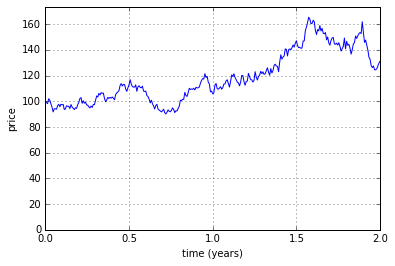

In [46]:
# Simulate a single Brownian motion path using BSM p274-275 from PfF
%pylab inline

num_steps = 300
S_0 = 100
r = 0.03
sigma = 0.3
T = 2.0
num_prices = num_steps + 1

dT = float(T) / num_steps
S = np.zeros(num_prices)
S[0] = S_0
for tIndex in range(1, num_prices):
    S[tIndex] = S[tIndex-1] * np.exp((r - 0.5* sigma**2) * dT + sigma * np.sqrt(dT) * np.random.standard_normal(1))

plt.plot([float(T) * s / num_steps for s in range(num_prices)],S, 'b', lw=1.0)
plt.xlabel('time (years)')
plt.ylabel('price')
plt.ylim(0, 1.05 * np.max(S))
plt.grid(True)

Populating the interactive namespace from numpy and matplotlib


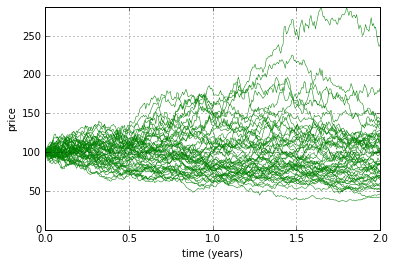

In [51]:
# Simulate a single Brownian motion path using BSM p274-275 from PfF
%pylab inline

num_steps = 300
num_paths = 50
S_0 = 100
r = 0.03
sigma = 0.3
T = 2.0
num_prices = num_steps + 1

dT = float(T) / num_steps
S = np.zeros((num_prices, num_paths))
S[0] = np.ones(num_paths)* S_0
for tIndex in range(1, num_prices):
    S[tIndex] = S[tIndex-1] * np.exp((r - 0.5* sigma**2) * dT + sigma * np.sqrt(dT) * np.random.standard_normal(num_paths))

plt.plot([float(T) * s / num_steps for s in range(num_prices)],S, 'g', lw=0.5)
plt.xlabel('time (years)')
plt.ylabel('price')
plt.ylim(0, np.max(S))
plt.grid(True)

$\frac{3}{4} \frac{2}{3}=\frac{1}{2}$

$\frac{15}{21} \frac{14}{20}=\frac{1}{2}$

$\frac{85}{120} \frac{84}{119}=\frac{1}{2}$

$\frac{b}{r+b} \frac{b-1}{r+b-1}=\frac{1}{2}$

$2b(b-1)=(r+b)(r+b-1)$

$r = \frac{1+\sqrt{1+8b(b-1)}}{2}-b$




In [18]:
r = 1
b = 3
while r+b < 1e+12:
    r = int(round((1+(1+8*b*(b-1))**0.5)/2))-b
    print r, b
    b = int((b -0.5)*(3 +8**0.5)+0.5)    

1 3
6 15
35 85
204 493
1189 2871
6930 16731
40391 97513
235416 568345
1372105 3312555
7997214 19306983
46611179 112529341
271669860 655869061
1583407981 3822685023
9228778026 22280241075
53789260175 129858761425
313506783024 756872327473
